In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [123]:
heart= pd.read_csv('heart.csv')
saturation= pd.read_csv('o2Saturation.csv')
Columns= heart.columns

heart

(303, 14)

In [124]:
X= heart.drop(['output'], axis=1)
y= heart['output']

array([[  3. , 233. , 150. ,   0. ,   2.3,   0. ],
       [  2. , 250. , 187. ,   0. ,   3.5,   0. ],
       [  1. , 204. , 172. ,   0. ,   1.4,   0. ],
       ...,
       [  0. , 193. , 141. ,   0. ,   3.4,   2. ],
       [  0. , 131. , 115. ,   1. ,   1.2,   1. ],
       [  1. , 236. , 174. ,   0. ,   0. ,   1. ]])

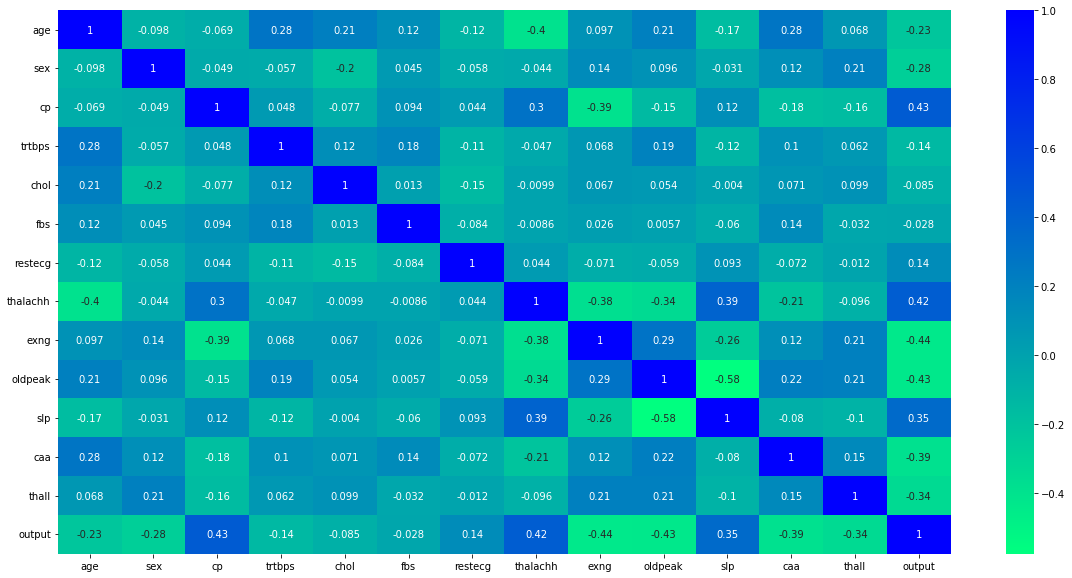

In [109]:
import seaborn as sns
correlation= heart.corr() 
top_correlation=  correlation.index
plt.figure(figsize=(20,10))
g= sns.heatmap(heart[top_correlation].corr(), annot=True, cmap='winter_r')

In [10]:
bestfeatures= SelectKBest(score_func=chi2, k=7)
fit= bestfeatures.fit(X, y)

dfscores= pd.DataFrame(fit.scores_)
dfcolumns= pd.DataFrame(Columns)

In [59]:
scores= pd.concat([dfcolumns, dfscores], axis=1)
scores.columns= ['features', 'scores']

scores
print(scores.nlargest(10, 'scores'))

    features      scores
7   thalachh  188.320472
9    oldpeak   72.644253
11       caa   66.440765
2         cp   62.598098
8       exng   38.914377
4       chol   23.936394
0        age   23.286624
3     trtbps   14.823925
10       slp    9.804095
1        sex    7.576835


In [100]:
new_X= X[['thalachh', 'oldpeak', 'caa', 'cp', 'exng', 'chol', 'age', 'trtbps']]

X_train, X_test, y_train, y_test= train_test_split(new_X, y, random_state=0)

In [61]:
scale= StandardScaler().fit(X_train)
X_scale= scale.transform(X_train)
X_trest= scale.transform(X_test)

In [139]:
model= XGBClassifier(learning_rate= 0.3, max_depth=6, min_child_weight= 2, eval_metric='auc')
model.fit(X_scale, y_train)
prediction= model.predict(X_trest)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        33
           1       0.82      0.86      0.84        43

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



In [134]:
mode= RandomForestClassifier(max_features=4, max_depth=2, random_state=0).fit(X_scale, y_train)
predict= mode.predict(X_trest)
print(mode.score(X_scale, y_train))
print(mode.score(X_trest, y_test))
print(classification_report(y_test, predict))

0.8722466960352423
0.8289473684210527
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        33
           1       0.80      0.93      0.86        43

    accuracy                           0.83        76
   macro avg       0.84      0.81      0.82        76
weighted avg       0.84      0.83      0.83        76



In [133]:
mod= KNeighborsClassifier(n_neighbors=5).fit(X_scale, y_train)
pred= mod.predict(X_trest)
print(mod.score(X_scale, y_train))
print(mod.score(X_trest, y_test))
print(classification_report(y_test, pred))

0.8546255506607929
0.881578947368421
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.89      0.91      0.90        43

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76

